# Predição de vitória no League of Legends

## Bibliotecas necessárias

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret.classification as clf
import pycaret.clustering as clst

## Leitura e tratamento dos dados

In [37]:
df = pd.read_csv('dataset/high_diamond_ranked_10min.csv')

df

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5           5            5                  0   
2                  0          7          11            4                  1   
3                  0          4           5            5                  1   
4                  0          6           6            6                  0   
...              ...        ...         ...          ...                ...   
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               1  ...                   0         17285          6.8   
3               0  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            1  ...                   0         15246          6.8   
9875            1  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            1  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  
...           ..

In [38]:
# verificando so tipos
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [39]:
# verificando valores faltantes
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [40]:
# analisando as colunas
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

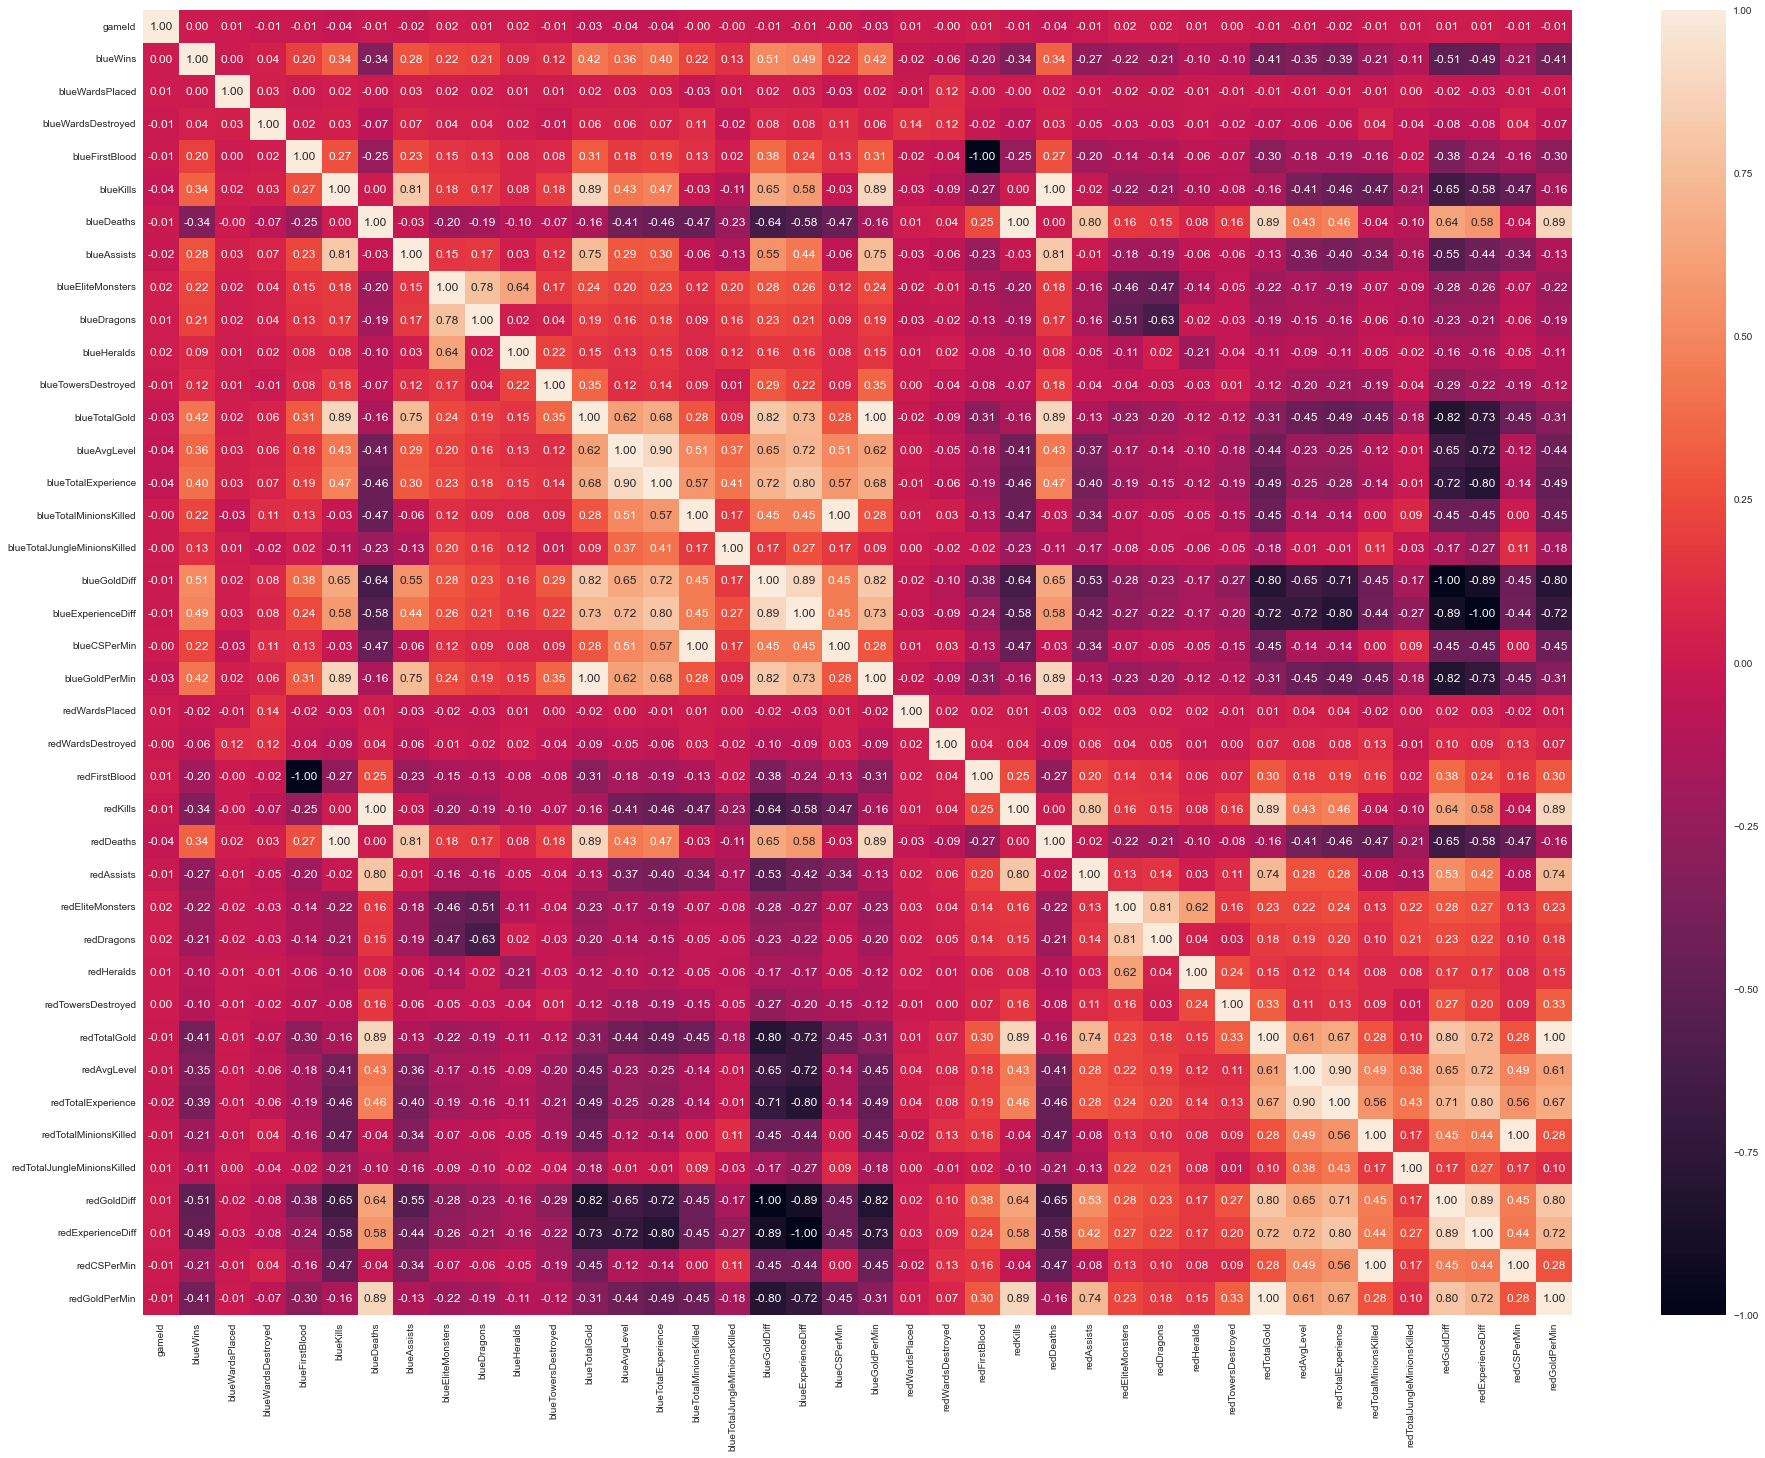

In [41]:
# procurando colunas que sejam ambiguas (correlação = 1 ou -1)
plt.figure(figsize=(32, 24))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [42]:
# removendo colunas ambiguas
df_clean = df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths', 'redGoldDiff', 'redExperienceDiff', 
                    'blueTotalGold', 'redTotalGold', 'blueTotalMinionsKilled', 'redTotalMinionsKilled'], axis=1)
                    
# alterando o nome das colunas que formavam pares com as colunas ambiguas removidas
df_clean = df_clean.rename(columns={'blueWins': 'winner', 'blueFirstBlood': 'firstBlood', 
                                    'blueKills': 'blueKills/redDeaths', 'blueDeaths': 'redKills/blueDeaths', 
                                    'blueGoldDiff': 'goldDiff', 'blueExperienceDiff': 'experienceDiff'})

# criando uma nova feature: KDA
df_clean['redKda'] = (df_clean['blueKills/redDeaths'] + df_clean['blueAssists']) / df_clean['redKills/blueDeaths']
df_clean['blueKda'] = (df_clean['redKills/blueDeaths'] + df_clean['redAssists']) / df_clean['blueKills/redDeaths']

df_clean

winner  blueWardsPlaced  blueWardsDestroyed  firstBlood  \
0          0               28                   2           1   
1          0               12                   1           0   
2          0               15                   0           0   
3          0               43                   1           0   
4          0               75                   4           0   
...      ...              ...                 ...         ...   
9874       1               17                   2           1   
9875       1               54                   0           0   
9876       0               23                   1           0   
9877       0               14                   4           1   
9878       1               18                   0           1   

      blueKills/redDeaths  redKills/blueDeaths  blueAssists  \
0                       9                    6           11   
1                       5                    5            5   
2                       7                   11            4   
3                       4                    5            5   
4                       6                    6            6   
...                   ...                  ...          ...   
9874                    7                    4            5   
9875                    6                    4            8   
9876                    6                    7            5   
9877                    2                    3            3   
9878                    6                    6            5   

      blueEliteMonsters  blueDragons  blueHeralds  ...  redDragons  \
0                     0            0            0  ...           0   
1                     0            0            0  ...           1   
2                     1            1            0  ...           0   
3                     1            0            1  ...           0   
4                     0            0            0  ...           1   
...                 ...          ...          ...  ...         ...   
9874                  1            1            0  ...           0   
9875                  1            1            0  ...           0   
9876                  0            0            0  ...           1   
9877                  1            1            0  ...           0   
9878                  0            0            0  ...           1   

      redHeralds  redTowersDestroyed  redAvgLevel  redTotalExperience  \
0              0                   0          6.8               17047   
1              1                   1          6.8               17438   
2              0                   0          6.8               17254   
3              0                   0          7.0               17961   
4              0                   0          7.0               18313   
...          ...                 ...          ...                 ...   
9874           0                   0          6.8               16498   
9875           0                   0          7.0               18367   
9876           0                   0          7.4               19909   
9877           0                   0          7.2               18314   
9878           0                   0          6.8               17379   

      redTotalJungleMinionsKilled  redCSPerMin  redGoldPerMin    redKda  \
0                              55         19.7         1656.7  3.333333   
1                              52         24.0         1762.0  2.000000   
2                              28         20.3         1728.5  1.000000   
3                              47         23.5         1647.8  1.800000   
4                              67         22.5         1740.4  2.000000   
...                           ...          ...            ...       ...   
9874                           34         22.9         1524.6  3.000000   
9875                           56         20.6         1545.6  3.500000   
9876                           60         26.1         1831.9  1.571429   


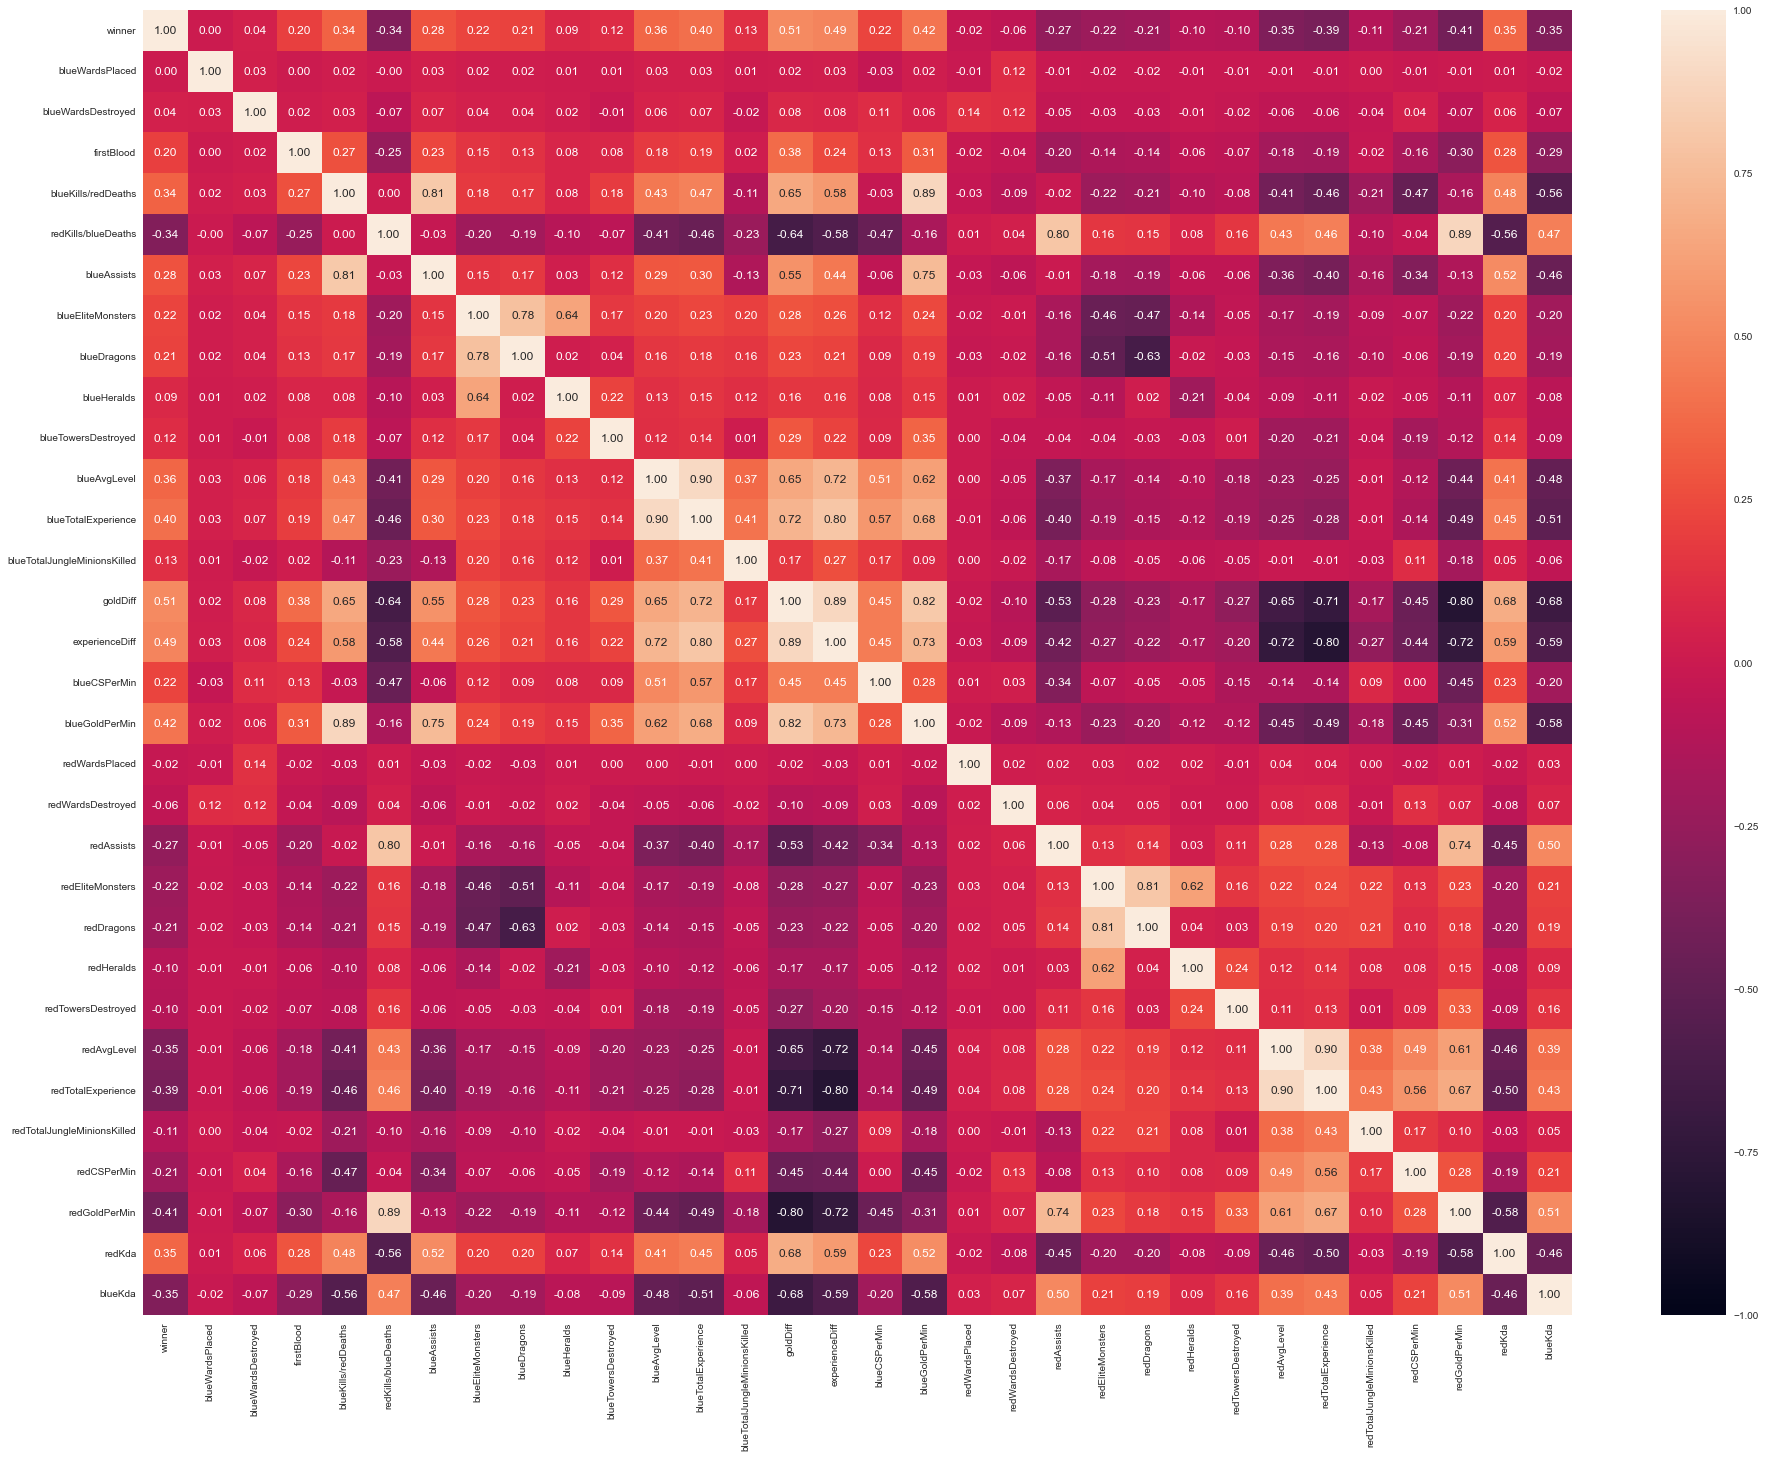

In [43]:
# checando a correlação após a remoção de algumas colunas
plt.figure(figsize=(32, 24))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

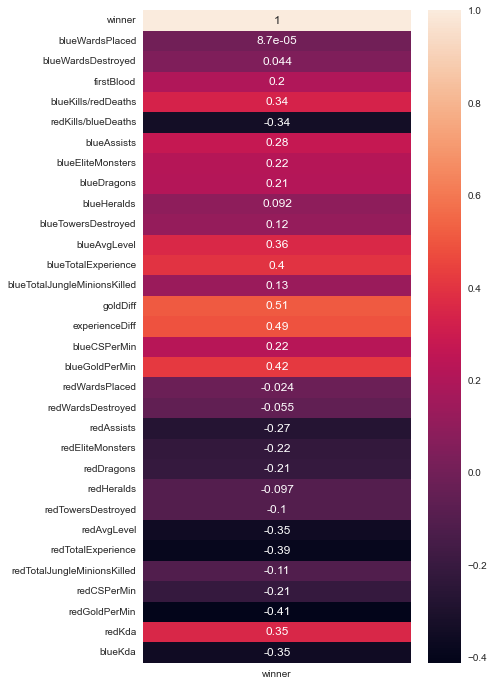

In [44]:
# filtrando a matriz anterior, observando apenas a correlação com a variavel winner
plt.figure(figsize=(6, 12))
sns.heatmap(df_clean.corr()[['winner']], annot=True)
plt.show()

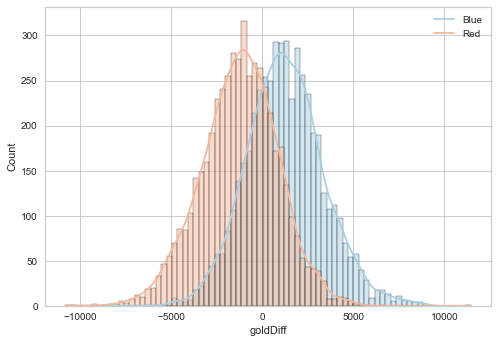

In [45]:
# distribuição da quantidade de vitórias em função da diferença de gold
sns.histplot(data=df_clean, x='goldDiff',hue='winner', palette='RdBu',kde=True)
plt.legend(labels=['Blue', 'Red'])
plt.show()

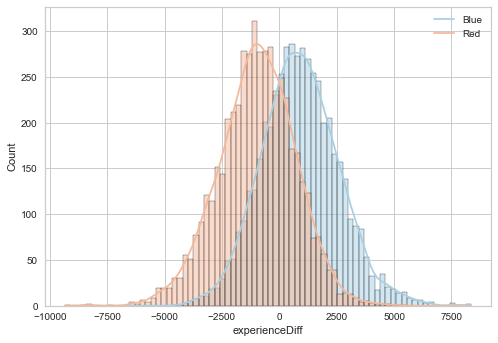

In [47]:
# distribuição da quantidade de vitórias em função da diferença de xp
sns.histplot(data=df_clean, x='experienceDiff',hue='winner', palette='RdBu',kde=True)
plt.legend(labels=['Blue', 'Red'])
plt.show()

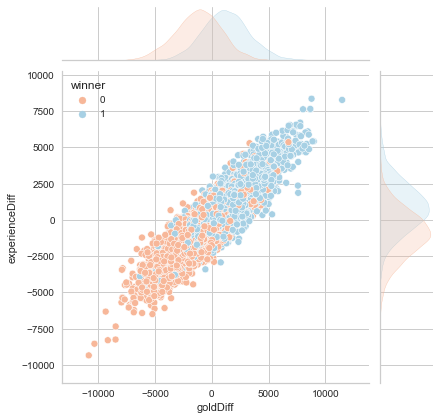

In [49]:
# goldDiff x experienceDiff
sns.jointplot(data = df_clean,x='goldDiff', y='experienceDiff', hue='winner', palette='RdBu')

<AxesSubplot:xlabel='firstBlood', ylabel='count'>

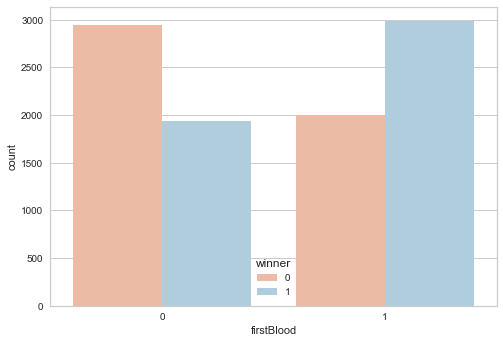

In [ ]:
# relação first blood e vitória
sns.countplot(data=df_clean, x='firstBlood', hue='winner', palette='RdBu')

<AxesSubplot:>

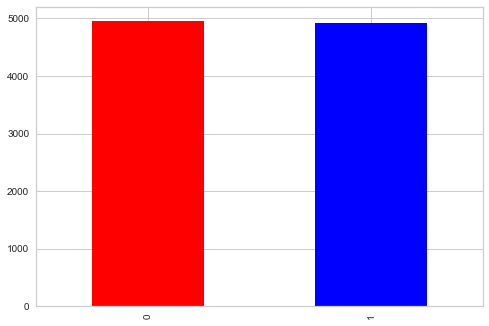

In [50]:
# quantidade de vitórias do time azul e vermelho na base de dados, observamos que a base está balanceada não necessitando nenhum pre processamento para balanceamento
df_clean['winner'].value_counts().plot(kind='bar', color=['red', 'blue'])

## Classificação

In [51]:
setup_model = clf.setup(df_clean, target='winner', normalize = True, 
                    session_id = 123, 
                    numeric_features=list(df_clean.drop('winner', 1).columns),
                    feature_selection=True,
                    silent=True)

In [52]:
clf.compare_models()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic Regression

In [53]:
lr = clf.create_model('lr')

In [54]:
tunned_lr = clf.tune_model(lr, optimize='f1')

In [55]:
clf.evaluate_model(tunned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [56]:
clf.predict_model(tunned_lr);

### Linear Discriminant Analysis

In [57]:
lda = clf.create_model('lda')

In [58]:
tunned_lda = clf.tune_model(lda)

In [59]:
clf.evaluate_model(tunned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

In [60]:
clf.predict_model(tunned_lda);

### XGBoost

In [61]:
gbc = clf.create_model('gbc')

In [62]:
tunned_gbc = clf.tune_model(gbc)

In [63]:
clf.evaluate_model(tunned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [64]:
clf.predict_model(tunned_gbc);

## Clusterização

In [65]:
setup_model = clst.setup(df_clean, normalize = True, 
                   ignore_features = ['winner'],
                   numeric_features=list(df_clean.drop('winner', 1).columns),
                   session_id = 123,
                   silent=True)

In [66]:
kmeans = clst.create_model('kmeans', num_clusters = 2)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1556          2154.7443          2.0508            0           0   

   Completeness  
0             0

In [67]:
kmean_results = clst.assign_model(kmeans)
kmean_results.head()

winner  blueWardsPlaced  blueWardsDestroyed  firstBlood  \
0       0               28                   2           1   
1       0               12                   1           0   
2       0               15                   0           0   
3       0               43                   1           0   
4       0               75                   4           0   

   blueKills/redDeaths  redKills/blueDeaths  blueAssists  blueEliteMonsters  \
0                    9                    6           11                  0   
1                    5                    5            5                  0   
2                    7                   11            4                  1   
3                    4                    5            5                  1   
4                    6                    6            6                  0   

   blueDragons  blueHeralds  ...  redHeralds  redTowersDestroyed  redAvgLevel  \
0            0            0  ...           0                   0          6.8   
1            0            0  ...           1                   1          6.8   
2            1            0  ...           0                   0          6.8   
3            0            1  ...           0                   0          7.0   
4            0            0  ...           0                   0          7.0   

   redTotalExperience  redTotalJungleMinionsKilled  redCSPerMin  \
0               17047                           55         19.7   
1               17438                           52         24.0   
2               17254                           28         20.3   
3               17961                           47         23.5   
4               18313                           67         22.5   

   redGoldPerMin    redKda   blueKda    Cluster  
0         1656.7  3.333333  1.555556  Cluster 0  
1         1762.0  2.000000  1.400000  Cluster 1  
2         1728.5  1.000000  3.571429  Cluster 1  
3         1647.8  1.800000  3.750000  Cluster 1  
4         1740.4  2.000000  2.166667  Cluster 1  

[5 rows x 33 columns]

In [68]:
clst.plot_model(kmeans)

In [69]:
clst.plot_model(kmeans, plot = 'distribution', feature = 'winner')